In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pmdarima as pm

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx.head(3)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,68400,3,0,0.00,68100,68700,68000,4971111,339772052700,408333126420000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,581000,1,7000,1.22,574000,584000,572000,140486,81320666000,135954000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,97100,2,-800,-0.82,97400,97800,96300,1288690,124847288500,70689029641500,728002365,STK


In [3]:
ticker = df_krx[df_krx['Name']=='삼성전자']['Code']

In [4]:
ss = fdr.DataReader(''.join(ticker.values), start='2020-01-01')

In [5]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2020-01-02 to 2023-05-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    840 non-null    int64  
 1   High    840 non-null    int64  
 2   Low     840 non-null    int64  
 3   Close   840 non-null    int64  
 4   Volume  840 non-null    int64  
 5   Change  840 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 45.9 KB


<Axes: xlabel='Date'>

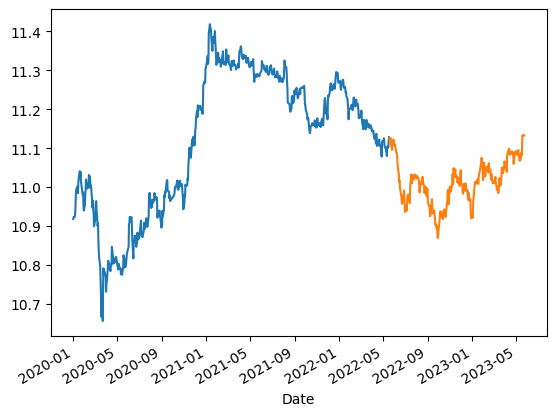

In [8]:
y_train = log_scaled_ss['Close'][:int(0.7*len(ss))]
y_text = log_scaled_ss['Close'][int(0.7*len(ss)):]

plt.subplot()
y_train.plot()
y_text.plot()

In [9]:
kpss_diffs = pm.arima.ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = pm.arima.ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
max(kpss_diffs, adf_diffs)


1

In [10]:
log_scaled_ss = np.log(ss)
log_scaled_ss

/opt/homebrew/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,10.924138,10.933107,10.915088,10.918718,16.379939,NaN
2020-01-03,10.933107,10.943764,10.913269,10.924138,16.551322,-5.214936
2020-01-06,10.913269,10.925938,10.907789,10.924138,16.145609,-inf
2020-01-07,10.927735,10.940224,10.925938,10.929529,16.119073,-5.220356
2020-01-08,10.936672,10.957800,10.931320,10.947292,16.972561,-4.021774
...,...,...,...,...,...,...
2023-05-18,11.097410,11.100436,11.092854,11.100436,16.484938,-3.992066
2023-05-19,11.124317,11.133128,11.119883,11.133128,16.828559,-3.404223
2023-05-22,11.133128,11.141862,11.127263,11.134589,16.487609,-6.527958


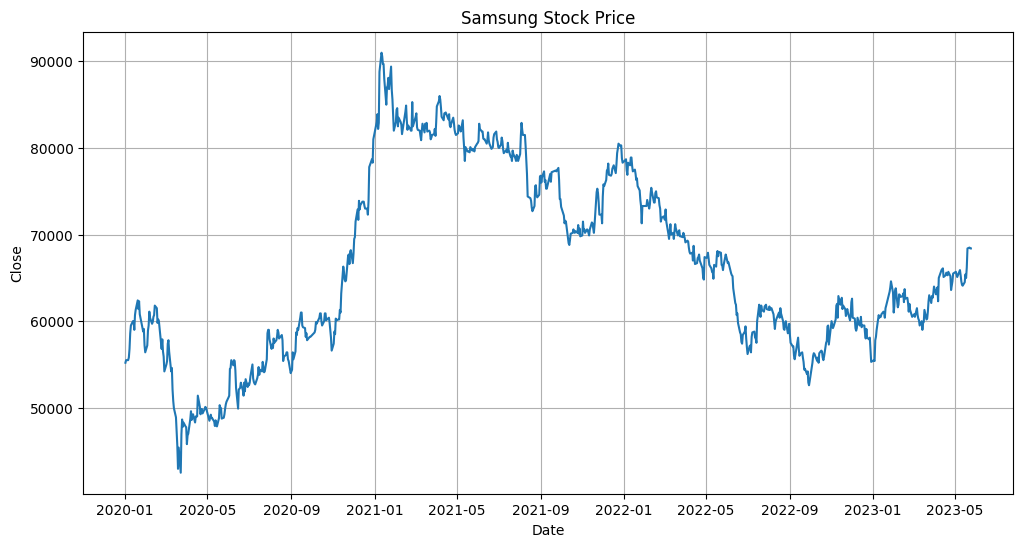

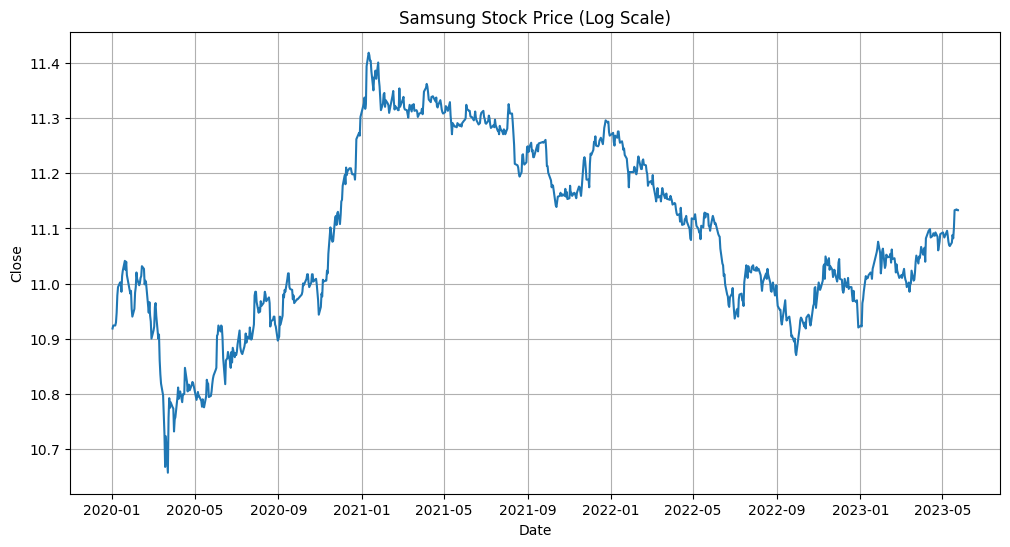

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(ss['Close'])
plt.title('Samsung Stock Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(log_scaled_ss['Close'])
plt.title('Samsung Stock Price (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True)
plt.show()

## STEP 3 : 시계열 안정성 분석
* 정성적 그래프 분석
* 정량적 Augmented Dicky-Fuller Test
* 시계열 분해(Time Series Decomposition)
* Residual 안정성 확인

In [12]:
# 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [13]:

# 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 함수
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


정성적 그래프 분석 :


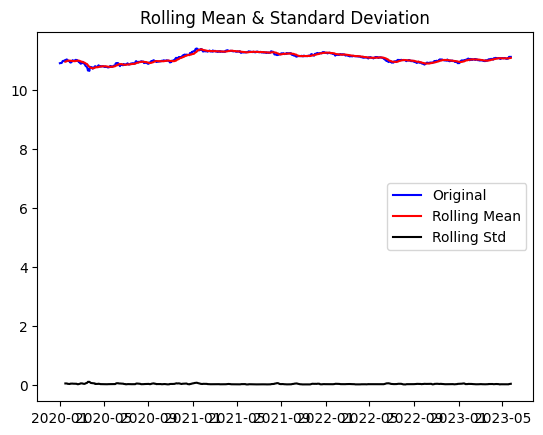


정량적 Augmented Dicky-Fuller Test :
Results of Dickey-Fuller Test:
Test Statistic                  -1.665212
p-value                          0.449120
#Lags Used                       0.000000
Number of Observations Used    839.000000
Critical Value (1%)             -3.438168
Critical Value (5%)             -2.864991
Critical Value (10%)            -2.568608
dtype: float64

시계열 분해 (Time Series Decomposition) :


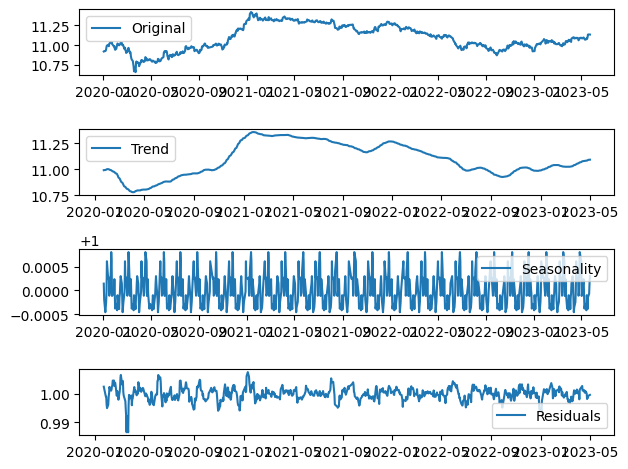

In [14]:
print()
print('\033[31m'+'\033[1m' + "정성적 그래프 분석 :" + '\033[0m')
# 정성적 그래프 분석
plot_rolling_statistics(log_scaled_ss['Close'], window=12)

print()
print('\033[31m'+'\033[1m' + "정량적 Augmented Dicky-Fuller Test :" + '\033[0m')
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(log_scaled_ss['Close'])

print()
print('\033[31m'+'\033[1m' + "시계열 분해 (Time Series Decomposition) :" + '\033[0m')
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(log_scaled_ss['Close'], model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(log_scaled_ss['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

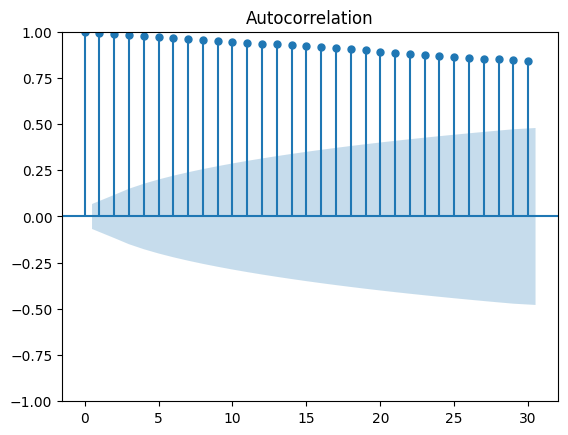

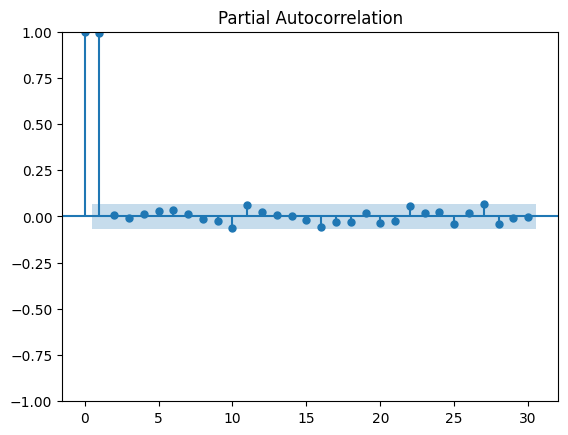

In [15]:
#ACF, #PACF 그래프 확인
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(log_scaled_ss['Close'])
plot_pacf(log_scaled_ss['Close'])
plt.show()

In [16]:
#차분

diff_1 = log_scaled_ss['Close'].diff(1).iloc[1:]
print(diff_1)
print(augmented_dickey_fuller_test(diff_1))

Date
2020-01-03    0.005420
2020-01-06    0.000000
2020-01-07    0.005391
2020-01-08    0.017762
2020-01-09    0.031198
                ...   
2023-05-18    0.018293
2023-05-19    0.032692
2023-05-22    0.001461
2023-05-23   -0.001461
2023-05-24    0.000000
Name: Close, Length: 839, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -29.187029
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    838.000000
Critical Value (1%)             -3.438177
Critical Value (5%)             -2.864995
Critical Value (10%)            -2.568610
dtype: float64
None


In [17]:
#pmdarima.arima.auto_arima

model = pm.arima.auto_arima(y=y_train, d=1,
                    start_p=0, max_p=3,
                    start_q=0, max_q=3,
                    m=1, seasonal=False,
                    stepwise=True,
                    trace=True
                    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3120.627, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3118.628, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3118.626, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3122.363, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3117.174, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.176 seconds


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  588
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1562.182
Date:                Wed, 24 May 2023   AIC                          -3122.363
Time:                        13:23:48   BIC                          -3117.988
Sample:                             0   HQIC                         -3120.659
                                - 588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   1.02e-05     28.053      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               297.71
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

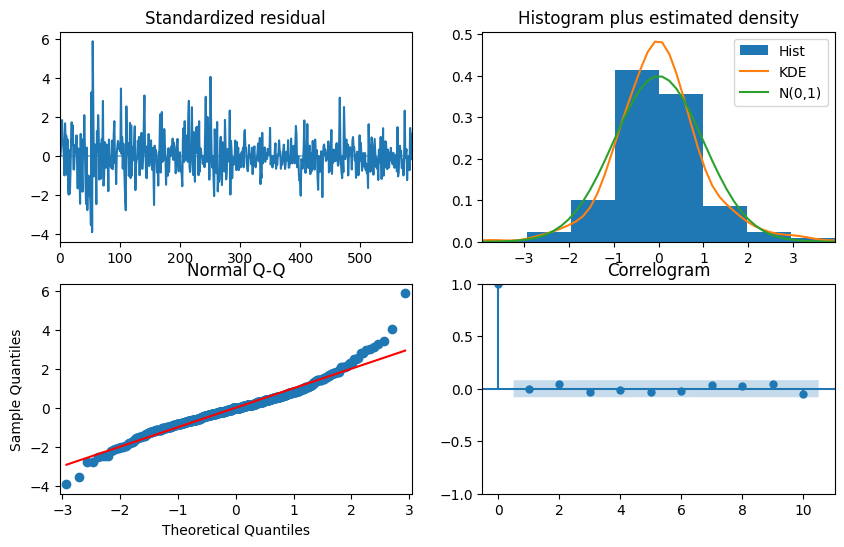

In [19]:
#model.plot_diagnostics 이용해서 그래프로 확인하기

model.plot_diagnostics(figsize=(10,6))
plt.show()

In [20]:
# 테스트 데이터를 통한 예측

Y_pred = model.predict(n_periods=len(y_text))
Y_pred_dt = pd.DataFrame(Y_pred.values, index=y_text.index, columns=['pridiction'])
Y_pred_dt

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,pridiction
Date,
2022-05-19,11.128732
2022-05-20,11.128732
2022-05-23,11.128732
2022-05-24,11.128732
2022-05-25,11.128732
...,...
2023-05-18,11.128732
2023-05-19,11.128732
2023-05-22,11.128732


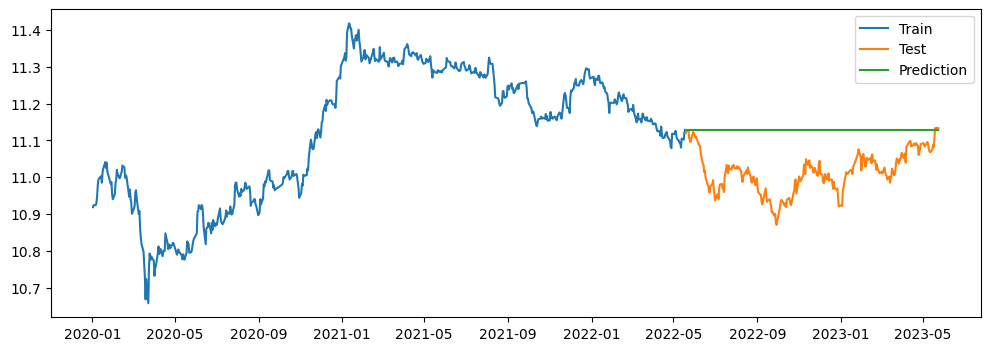

In [21]:
# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(y_train, label='Train')        # 훈련 데이터
plt.plot(y_text, label='Test')          # 테스트 데이터
plt.plot(Y_pred_dt, label='Prediction')  # 예측 데이터
plt.legend()
plt.show()

In [22]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (fc.tolist()[0], np.asarray(conf_int).tolist()[0])

In [23]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_text:
    fc, conf=forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ##model update
    model.update(new_ob)

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [24]:
pd.DataFrame({"test":y_text, "pred":y_pred})

,test,pred
Date,,
2022-05-19,11.119883,11.128732
2022-05-20,11.127263,11.119883
2022-05-23,11.125791,11.127263
2022-05-24,11.104957,11.125791
2022-05-25,11.103452,11.104957
...,...,...
2023-05-18,11.100436,11.082143
2023-05-19,11.133128,11.100436
2023-05-22,11.134589,11.133128


In [25]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  840
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2259.291
Date:                Wed, 24 May 2023   AIC                          -4516.581
Time:                        13:24:00   BIC                          -4511.849
Sample:                             0   HQIC                         -4514.767
                                - 840                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   8.46e-06     31.703      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               301.65
Prob(Q):                              0.79   Pr

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_text.index, y = y_text, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_text.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_text.index.tolist() + y_text.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA(0,1,0)모형")
fig.show()

In [27]:
from sklearn.datasets import load_digits
mnist = load_digits()

mnist.data[0].shape

(64,)

In [28]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 